First, we need to install Twint.

In [1]:
import os
!pip install twint
!pip uninstall twint -y
!git clone --depth=1 https://github.com/twintproject/twint.git
%cd twint/
!pip3 install . -r requirements.txt
%cd ..

     |████████████████████████████████| 1.3 MB 6.1 MB/s 
     |████████████████████████████████| 263 kB 71.7 MB/s 
     |████████████████████████████████| 378 kB 59.0 MB/s 
     |████████████████████████████████| 291 kB 56.9 MB/s 
     |████████████████████████████████| 271 kB 76.7 MB/s 
     |████████████████████████████████| 160 kB 70.0 MB/s 
  Created wheel for twint: filename=twint-2.1.20-py3-none-any.whl size=33930 sha256=aecf971558b18a813a16c51af86eae7e642efbca91edc3e65f5e714de5e1842b
  Stored in directory: /root/.cache/pip/wheels/44/fc/77/99887a36b5c265a87516158858697d1a0b8f32c4d4dbddbb24
  Created wheel for fake-useragent: filename=fake_useragent-0.1.11-py3-none-any.whl size=13502 sha256=83f52dcc694917af8f0787334e755e25343e0f81f5c7e0a1990729eff70eb8d0
  Stored in directory: /root/.cache/pip/wheels/ed/f7/62/50ab6c9a0b5567267ab76a9daa9d06315704209b2c5d032031
  Created wheel for googletransx: filename=googletransx-2.4.2-py3-none-any.whl size=15968 sha256=1950785cc6ae9c32a7ca6f0130

In [2]:
#importing nest_asyncio to make twint work in google colab and, obviously, twint
import nest_asyncio
nest_asyncio.apply()

import twint

# Let's get the tweets!

In [3]:

#Getting the tweets with #Navalny hashtag.
#We are getting 3 000 tweets in english
#Note: lang in twint do not seems to work, so when we are going to do data analysis we still need to
#sort by language.

c=twint.Config()
c.Search="#navalny"
c.Limit=2000
c.Store_csv = True
#saving the tweets into Navalny.csv
c.Output = "Navalny.csv"
c.Lang = "eng"
twint.run.Search(c)

1454320116108255232 2021-10-30 05:31:50 +0000 <namstak> #свободуНавальному #навальный #свободуПолитзаключенным #пишитеПисьмаПолитзаключенным #NAVALNY #freeNavalny - - - #россияБезПутина
1454219306737209347 2021-10-29 22:51:15 +0000 <N1EUWS> Sacharovprijs voor Navalny, betaald door het Europees parlement en Stoltenberg stelt dat de NAVO een aanval op Rusland zal winnen - #Sacharov oo #Navalny, #nieuws #rtlnieuws #Eenvandaag #journaal #NOSjournaal #nieuwsuur #Rusland   https://t.co/bfENAPwkQ8
1454210441647960069 2021-10-29 22:16:01 +0000 <47leakiM> @niinisto Saksasta tuli ohjeet ettei #navalny'stä sitten puhuta jotta saadaan saksaan kaasua 🇩🇪🖤🇷🇺  https://t.co/qvOkP88h9C
1454149638303404039 2021-10-29 18:14:25 +0000 <RussianFP> #Sobol / #Navalny / #Georgia Lyubov Sobol, Navalny’s comrade-in-arms told that she was denied entry into Georgia Read:  https://t.co/ze1mD1MV7h  https://t.co/4s5MXDAKM3
1454075468831932422 2021-10-29 13:19:41 +0000 <louloeber> @mlurvink12 @GelderToi @HenriSouth @NO

In [4]:
#The same way, getting the tweets with #Putin hashtag.
d=twint.Config()
d.Search="#putin"
d.Limit=2000
d.Store_csv = True
#saving the data into Putin.csv
d.Output = "Putin.csv"
d.Lang = "eng"
twint.run.Search(d)

1454340720362414081 2021-10-30 06:53:42 +0000 <ignis_fatum> Earlier last week , Sergei Savelyev , the #Putin regime enforcer turned whistleblower that uncovered all the evidence was declared wanted by the regime for “revealing state secrets” (not kidding). He already fled to France and received political asylum. #Russia
1454340718588219393 2021-10-30 06:53:42 +0000 <ignis_fatum> The #Putin regime enforcers had demanded from Youtube Russia to ban the video evidence of the widespread torture practices in #Russia’n prisons posted by “Gulagu net”organization account.
1454339167454994437 2021-10-30 06:47:32 +0000 <IvanetsZalesski> "The Living  And The Dead". In #Russia, an investigation has been opened into the case of  artist Kirill Miller who allegedly insulted the memory of WWII veterans with this painting. A complaint was filed by the chauvinist pro- #Putin  movement "Immortal Regiment".  https://t.co/orlizL7zaL
1454334286136545280 2021-10-30 06:28:08 +0000 <iuvinale_n> ⚠️#Biden al #G20

In [5]:
import numpy as np
import pandas as pd

# Let's process the data!

First, lets see what do we have. 

In [6]:
df_navalny=pd.read_csv('Navalny.csv')
df_navalny.head()

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,tweet,language,mentions,urls,photos,replies_count,retweets_count,likes_count,hashtags,cashtags,link,retweet,quote_url,video,thumbnail,near,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,1454320116108255232,1454320116108255232,2021-10-30 05:31:50 UTC,2021-10-30,05:31:50,0,1307431334919405569,namstak,.,NaN,#свободуНавальному #навальный #свободуПолитзак...,und,[],[],[],0,1,1,"['свободунавальному', 'навальный', 'свободупол...",[],https://twitter.com/namstak/status/14543201161...,False,https://twitter.com/markelov_dan/status/145428...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
1,1454219306737209347,1454219306737209347,2021-10-29 22:51:15 UTC,2021-10-29,22:51:15,0,72341630,n1euws,#1 NIEUWS. Free Assange,NaN,"Sacharovprijs voor Navalny, betaald door het E...",nl,[],['https://deazijnpisser.blogspot.com/2021/10/s...,[],0,0,0,"['sacharov', 'navalny', 'nieuws', 'rtlnieuws',...",[],https://twitter.com/N1EUWS/status/145421930673...,False,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
2,1454210441647960069,1454103024339755009,2021-10-29 22:16:01 UTC,2021-10-29,22:16:01,0,1283497876233101318,47leakim,Mikael,NaN,@niinisto Saksasta tuli ohjeet ettei #navalny'...,fi,[],[],['https://pbs.twimg.com/tweet_video_thumb/FC5k...,0,0,2,['navalny'],[],https://twitter.com/47leakiM/status/1454210441...,False,NaN,1,https://pbs.twimg.com/tweet_video_thumb/FC5krv...,NaN,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'niinisto', 'name': 'Sauli Ni...",NaN,NaN,NaN,NaN
3,1454149638303404039,1454149638303404039,2021-10-29 18:14:25 UTC,2021-10-29,18:14:25,0,1422063886887424000,russianfp,Russian Free Press,NaN,"#Sobol / #Navalny / #Georgia Lyubov Sobol, Nav...",en,[],['https://russianfreepress.com/2021/10/29/lyub...,['https://pbs.twimg.com/media/FC4tYnQXMAEqXSR....,0,0,2,"['sobol', 'navalny', 'georgia']",[],https://twitter.com/RussianFP/status/145414963...,False,NaN,1,https://pbs.twimg.com/media/FC4tYnQXMAEqXSR.jpg,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
4,1454075468831932422,1453713469447016448,2021-10-29 13:19:41 UTC,2021-10-29,13:19:41,0,4097577023,louloeber,Ben Cohen,NaN,@mlurvink12 @GelderToi @HenriSouth @NOS Van de...,nl,"[{'screen_name': 'mlurvink12', 'name': 'm. lur...",[],[],1,0,2,"['navalny', 'protasevitch', 'azov', 'belarus']",[],https://twitter.com/louloeber/status/145407546...,False,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'mlurvink12', 'name': 'M. Lur...",NaN,NaN,NaN,NaN


<!-- We do not need all of this columns, so lets drop them. -->

Let's clean up our datasets to make it more understandable and 

In [8]:
 df_navalny.drop('conversation_id', axis = 1, inplace = True)
 df_navalny.drop('created_at', axis = 1, inplace = True)
 df_navalny.drop('timezone', axis = 1, inplace = True)
 df_navalny.drop('place', axis = 1, inplace = True)
 df_navalny.drop('mentions', axis = 1, inplace = True)
 df_navalny.drop('photos', axis = 1, inplace = True)
 df_navalny.drop('urls', axis = 1, inplace = True)
 df_navalny.drop('replies_count', axis = 1, inplace = True)
 df_navalny.drop('likes_count', axis = 1, inplace = True)
 df_navalny.drop('cashtags', axis = 1, inplace = True)
 df_navalny.drop('retweet', axis = 1, inplace = True)
 df_navalny.drop('quote_url', axis = 1, inplace = True)
 df_navalny.drop('video', axis = 1, inplace = True)
 df_navalny.drop('thumbnail', axis = 1, inplace = True)
 df_navalny.drop('near', axis = 1, inplace = True)
 df_navalny.drop('geo', axis = 1, inplace = True)
 df_navalny.drop('source', axis = 1, inplace = True)
 df_navalny.drop('user_rt_id', axis = 1, inplace = True)
 df_navalny.drop('user_rt', axis = 1, inplace = True)
 df_navalny.drop('retweet_id', axis = 1, inplace = True)
 df_navalny.drop('retweet_date', axis = 1, inplace = True)
 df_navalny.drop('translate', axis = 1, inplace = True)
 df_navalny.drop('trans_src', axis = 1, inplace = True)
 df_navalny.drop('trans_dest', axis = 1, inplace = True)
 df_navalny.drop('retweets_count', axis = 1, inplace = True)


In [7]:
df_putin=pd.read_csv('Putin.csv')

In [10]:
#and do the same with putin data

df_putin.drop('conversation_id', axis = 1, inplace = True)
df_putin.drop('created_at', axis = 1, inplace = True)
df_putin.drop('timezone', axis = 1, inplace = True)
df_putin.drop('place', axis = 1, inplace = True)
df_putin.drop('mentions', axis = 1, inplace = True)
df_putin.drop('photos', axis = 1, inplace = True)
df_putin.drop('urls', axis = 1, inplace = True)
df_putin.drop('replies_count', axis = 1, inplace = True)
df_putin.drop('likes_count', axis = 1, inplace = True)
df_putin.drop('cashtags', axis = 1, inplace = True)
df_putin.drop('retweet', axis = 1, inplace = True)
df_putin.drop('quote_url', axis = 1, inplace = True)
df_putin.drop('video', axis = 1, inplace = True)
df_putin.drop('thumbnail', axis = 1, inplace = True)
df_putin.drop('near', axis = 1, inplace = True)
df_putin.drop('geo', axis = 1, inplace = True)
df_putin.drop('source', axis = 1, inplace = True)
df_putin.drop('user_rt_id', axis = 1, inplace = True)
df_putin.drop('user_rt', axis = 1, inplace = True)
df_putin.drop('retweet_id', axis = 1, inplace = True)
df_putin.drop('retweet_date', axis = 1, inplace = True)
df_putin.drop('translate', axis = 1, inplace = True)
df_putin.drop('trans_src', axis = 1, inplace = True)
df_putin.drop('trans_dest', axis = 1, inplace = True)
df_putin.drop('retweets_count', axis = 1, inplace = True)



In [11]:
#Let's see what we got now
df_navalny.head()

,id,date,time,user_id,username,name,tweet,language,hashtags,link,reply_to
0,1454320116108255232,2021-10-30,05:31:50,1307431334919405569,namstak,.,#свободуНавальному #навальный #свободуПолитзак...,und,"['свободунавальному', 'навальный', 'свободупол...",https://twitter.com/namstak/status/14543201161...,[]
1,1454219306737209347,2021-10-29,22:51:15,72341630,n1euws,#1 NIEUWS. Free Assange,"Sacharovprijs voor Navalny, betaald door het E...",nl,"['sacharov', 'navalny', 'nieuws', 'rtlnieuws',...",https://twitter.com/N1EUWS/status/145421930673...,[]
2,1454210441647960069,2021-10-29,22:16:01,1283497876233101318,47leakim,Mikael,@niinisto Saksasta tuli ohjeet ettei #navalny'...,fi,['navalny'],https://twitter.com/47leakiM/status/1454210441...,"[{'screen_name': 'niinisto', 'name': 'Sauli Ni..."
3,1454149638303404039,2021-10-29,18:14:25,1422063886887424000,russianfp,Russian Free Press,"#Sobol / #Navalny / #Georgia Lyubov Sobol, Nav...",en,"['sobol', 'navalny', 'georgia']",https://twitter.com/RussianFP/status/145414963...,[]
4,1454075468831932422,2021-10-29,13:19:41,4097577023,louloeber,Ben Cohen,@mlurvink12 @GelderToi @HenriSouth @NOS Van de...,nl,"['navalny', 'protasevitch', 'azov', 'belarus']",https://twitter.com/louloeber/status/145407546...,"[{'screen_name': 'mlurvink12', 'name': 'M. Lur..."


# Let's do clean up! (2.0)


Why? Because useless info only will get in our way when it is time to analyze tweets and their sentiments.
Therefore, we do not need such things as:


1.   URLs
2.   Mentions
3.   Even hashtags (we already segregated the data)



In [12]:
#importing re for working w strings
import re
re.compile('<title>(.*)</title>')

#importing tokenizer
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

**Note**: sometimes Google Colab ask for 
pip install stop-words
but sometimes marks this an error and only import works.
If you see a error in import, please
uncomment/comment next line


In [14]:
pip install stop-words

  Created wheel for stop-words: filename=stop_words-2018.7.23-py3-none-any.whl size=32912 sha256=b6305901f236e341872e8007fc507d292f30988bf5333112333f48bad0c8ec4e
  Stored in directory: /root/.cache/pip/wheels/fb/86/b2/277b10b1ce9f73ce15059bf6975d4547cc4ec3feeb651978e9
Successfully built stop-words


In [15]:
from stop_words import get_stop_words
stop_words = get_stop_words('en')

In [16]:
#function for slearing the tweets to analyze the sentiment 
def remove_content(text):
    text = re.sub(r"http\S+", "", text) #remove urls
    text=re.sub(r'\S+\.com\S+','',text) #remove urls
    text=re.sub(r'\@\w+','',text) #remove mentions
    text =re.sub(r'\#\w+','',text) #remove hashtags
    return text
def process_text(text, stem=False): #clean text
    text=remove_content(text)
    text = re.sub('[^A-Za-z]', ' ', text.lower()) #remove non-alphabets
    tokenized_text = word_tokenize(text) #tokenize
    clean_text = [
         word for word in tokenized_text
         if word not in stop_words
    ]
    if stem:
        clean_text=[stemmer.stem(word) for word in clean_text]
    return ' '.join(clean_text)

# Cleaning the tweets! 
Clean tweets are saved in new column. 

In [19]:

df_navalny['cleaned_tweets']=df_navalny['tweet'].apply(lambda x: process_text(x))
df_navalny['tweet']=df_navalny['tweet'].apply(lambda x: remove_content(x))


Let's see the result of cleaning!

In [20]:
df_navalny.head()

,id,date,time,user_id,username,name,tweet,language,hashtags,link,reply_to,cleaned_tweets
0,1454320116108255232,2021-10-30,05:31:50,1307431334919405569,namstak,.,- - -,und,"['свободунавальному', 'навальный', 'свободупол...",https://twitter.com/namstak/status/14543201161...,[],
1,1454219306737209347,2021-10-29,22:51:15,72341630,n1euws,#1 NIEUWS. Free Assange,"Sacharovprijs voor Navalny, betaald door het E...",nl,"['sacharov', 'navalny', 'nieuws', 'rtlnieuws',...",https://twitter.com/N1EUWS/status/145421930673...,[],sacharovprijs voor navalny betaald door het eu...
2,1454210441647960069,2021-10-29,22:16:01,1283497876233101318,47leakim,Mikael,Saksasta tuli ohjeet ettei 'stä sitten puhuta...,fi,['navalny'],https://twitter.com/47leakiM/status/1454210441...,"[{'screen_name': 'niinisto', 'name': 'Sauli Ni...",saksasta tuli ohjeet ettei st sitten puhuta jo...
3,1454149638303404039,2021-10-29,18:14:25,1422063886887424000,russianfp,Russian Free Press,"/ / Lyubov Sobol, Navalny’s comrade-in-arms...",en,"['sobol', 'navalny', 'georgia']",https://twitter.com/RussianFP/status/145414963...,[],lyubov sobol navalny s comrade arms told denie...
4,1454075468831932422,2021-10-29,13:19:41,4097577023,louloeber,Ben Cohen,Van deze vergelijking door kameraad wordt...,nl,"['navalny', 'protasevitch', 'azov', 'belarus']",https://twitter.com/louloeber/status/145407546...,"[{'screen_name': 'mlurvink12', 'name': 'M. Lur...",van deze vergelijking door kameraad wordt koni...


# Data Analysis
With the help of the data we can see what is mentioned the most in tweets about Navalny An Putin. 

Lets see word cloud of Navalny. What is the most mentioned about him?

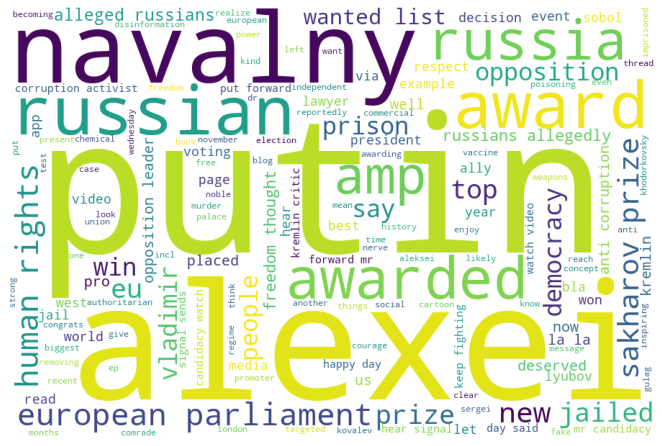

In [21]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
temp=' '.join(df_navalny[df_navalny['language']=='en']['cleaned_tweets'].tolist())
wordcloud = WordCloud(width = 900, height = 600, 
                background_color ='white', 
                min_font_size = 10).generate(temp)
plt.figure(figsize = (9,9), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0) 
plt.show()

In [22]:

df_putin['cleaned_tweets']=df_putin['tweet'].apply(lambda x: process_text(x))
df_putin['tweet']=df_putin['tweet'].apply(lambda x: remove_content(x))


Lets see word cloud of Putin. What is the most mentioned about him?

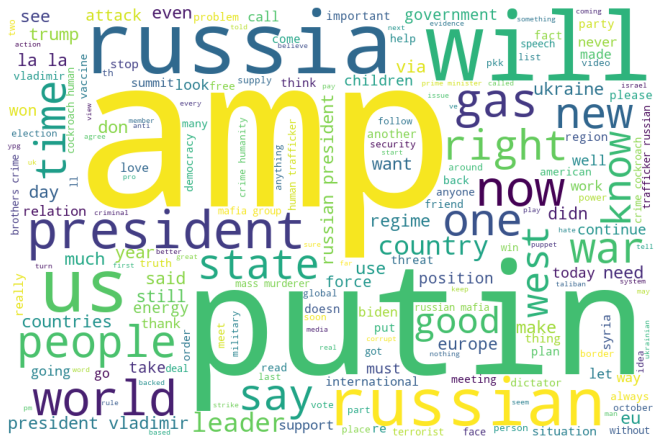

In [23]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
temp=' '.join(df_putin[df_putin['language']=='en']['cleaned_tweets'].tolist())
wordcloud = WordCloud(width = 900, height = 600, 
                background_color ='white', 
                min_font_size = 10).generate(temp)
plt.figure(figsize = (9, 9), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0) 
plt.show()

# Lets see how people react to two leaders (sentiment analysis time)

In [24]:
#here we are making a new column 'polarity' by applying textblob function on the processed tweets which are in english language
from textblob import TextBlob
df_navalny['polarity'] = df_navalny[df_navalny['language']=='en']['cleaned_tweets'].apply(lambda x: TextBlob(x).sentiment[0])

In [25]:
#assigning polarity with positive, negative, neutral
df_navalny['sentiment'] = df_navalny['polarity'].apply(lambda x: 'positive' if x > 0 else('negative' if x<0  else 'neutral'))

In [26]:
#Let's see the result 
df_navalny.head()

,id,date,time,user_id,username,name,tweet,language,hashtags,link,reply_to,cleaned_tweets,polarity,sentiment
0,1454320116108255232,2021-10-30,05:31:50,1307431334919405569,namstak,.,- - -,und,"['свободунавальному', 'навальный', 'свободупол...",https://twitter.com/namstak/status/14543201161...,[],,NaN,neutral
1,1454219306737209347,2021-10-29,22:51:15,72341630,n1euws,#1 NIEUWS. Free Assange,"Sacharovprijs voor Navalny, betaald door het E...",nl,"['sacharov', 'navalny', 'nieuws', 'rtlnieuws',...",https://twitter.com/N1EUWS/status/145421930673...,[],sacharovprijs voor navalny betaald door het eu...,NaN,neutral
2,1454210441647960069,2021-10-29,22:16:01,1283497876233101318,47leakim,Mikael,Saksasta tuli ohjeet ettei 'stä sitten puhuta...,fi,['navalny'],https://twitter.com/47leakiM/status/1454210441...,"[{'screen_name': 'niinisto', 'name': 'Sauli Ni...",saksasta tuli ohjeet ettei st sitten puhuta jo...,NaN,neutral
3,1454149638303404039,2021-10-29,18:14:25,1422063886887424000,russianfp,Russian Free Press,"/ / Lyubov Sobol, Navalny’s comrade-in-arms...",en,"['sobol', 'navalny', 'georgia']",https://twitter.com/RussianFP/status/145414963...,[],lyubov sobol navalny s comrade arms told denie...,0.0,neutral
4,1454075468831932422,2021-10-29,13:19:41,4097577023,louloeber,Ben Cohen,Van deze vergelijking door kameraad wordt...,nl,"['navalny', 'protasevitch', 'azov', 'belarus']",https://twitter.com/louloeber/status/145407546...,"[{'screen_name': 'mlurvink12', 'name': 'M. Lur...",van deze vergelijking door kameraad wordt koni...,NaN,neutral


In [27]:
df_putin['polarity'] = df_putin[df_putin['language']=='en']['cleaned_tweets'].apply(lambda x: TextBlob(x).sentiment[0])
df_putin['sentiment'] = df_putin['polarity'].apply(lambda x: 'positive' if x > 0 else('negative' if x<0  else 'neutral'))

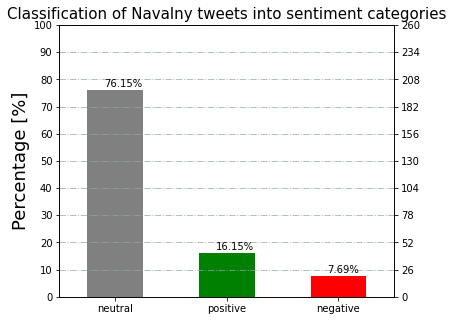

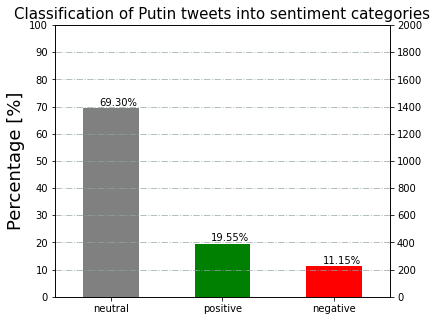

In [28]:
#for navalny
plt.figure(figsize=(6,5))
plt.title('Classification of Navalny tweets into sentiment categories',fontsize=15)
plt.ylabel('Percentage [%]',fontsize=18)
ax = (df_navalny.sentiment.value_counts()/len(df_navalny)*100).plot(kind="bar", rot=0,color=['gray','green','red'])
ax.set_yticks(np.arange(0, 110, 10))
plt.grid(color='#95a5a6', linestyle='-.', linewidth=1, axis='y', alpha=0.7)
ax2 = ax.twinx()
ax2.set_yticks(np.arange(0, 110, 10)*len(df_navalny)/100)
for p in ax.patches:
    ax.annotate('{:.2f}%'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))

    #for putin
plt.figure(figsize=(6,5))
plt.title('Classification of Putin tweets into sentiment categories',fontsize=15)
plt.ylabel('Percentage [%]',fontsize=18)
ax = (df_putin.sentiment.value_counts()/len(df_putin)*100).plot(kind="bar", rot=0,color=['gray','green','red'])
ax.set_yticks(np.arange(0, 110, 10))
plt.grid(color='#95a5a6', linestyle='-.', linewidth=1, axis='y', alpha=0.7)
ax2 = ax.twinx()
ax2.set_yticks(np.arange(0, 110, 10)*len(df_putin)/100)
for p in ax.patches:
    ax.annotate('{:.2f}%'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))

Another view of sentiments.

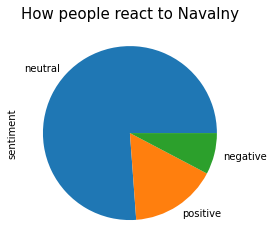

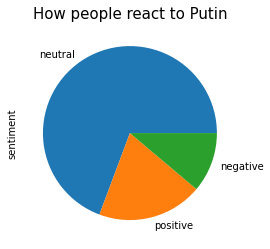

In [29]:
plt.title('How people react to Navalny',fontsize=15)
df_navalny.sentiment.value_counts(normalize=True)

df_navalny.sentiment.value_counts(normalize=True).plot.pie()
plt.show()

plt.title('How people react to Putin',fontsize=15)
df_putin.sentiment.value_counts(normalize=True)
df_putin.sentiment.value_counts(normalize=True).plot.pie()
plt.show()

# Network analysis

With the help of networkx we will build co-occurence network for fetched tweets.

In [30]:
from scipy import stats
from operator import itemgetter
import seaborn as sns
import itertools
import unicodedata
from scipy.spatial import distance
import nltk
#for network creation
import networkx as nx

In [31]:
#Let's convert cleaned tweets to an array
tweets = df_navalny['cleaned_tweets'].to_numpy()
regex = u'[a-zA-Z]'

len(tweets)

260

In [32]:
#And then split tweets into separate words AND lowering case
words_in_tweet = [tweet.lower().split() for tweet in tweets]

In [33]:
#let's check them
words_in_tweet

[[],
 ['sacharovprijs',
  'voor',
  'navalny',
  'betaald',
  'door',
  'het',
  'europees',
  'parlement',
  'en',
  'stoltenberg',
  'stelt',
  'dat',
  'de',
  'navo',
  'een',
  'aanval',
  'op',
  'rusland',
  'zal',
  'winnen',
  'oo'],
 ['saksasta',
  'tuli',
  'ohjeet',
  'ettei',
  'st',
  'sitten',
  'puhuta',
  'jotta',
  'saadaan',
  'saksaan',
  'kaasua'],
 ['lyubov',
  'sobol',
  'navalny',
  's',
  'comrade',
  'arms',
  'told',
  'denied',
  'entry',
  'georgia',
  'read'],
 ['van',
  'deze',
  'vergelijking',
  'door',
  'kameraad',
  'wordt',
  'koninkrijk',
  'politburo',
  'o',
  'l',
  'v',
  'van',
  'apparatchik',
  'bepaaldelijk',
  'niet',
  'vrolijk',
  'conundrum',
  'waarom',
  'alle',
  'russen',
  'moeten',
  'op',
  'communistische',
  'partij',
  'stemmen',
  'amp',
  'de',
  'doorgeslagen',
  'neonazi',
  'hier',
  'staan'],
 ['exiled', 'lawyer', 'says', 'placed', 'russia', 's', 'wanted', 'list'],
 ['herr',
  'sie',
  'sind',
  'doch',
  'immer',
  'bes

In [34]:
# Remove useless for us words from array

tweets_nsw = [[word for word in tweet_words]
              for tweet_words in words_in_tweet]
collection_words = ['navalny', 'alexei', 'alexei navalny']

tweets_nsw_nc = [[w for w in word if not w in collection_words]
                 for word in tweets_nsw]

In [37]:
#Now, counting the words
word_count = {}
for words in words_in_tweet:
    for word in words:
        if word not in word_count:
            word_count[word] = 1
        else:
            word_count[word] += 1
    
word_count_df_navalny = pd.DataFrame({'word': [k for k in word_count.keys()], 'count': [v for v in word_count.values()]})
len(word_count_df_navalny)

1871

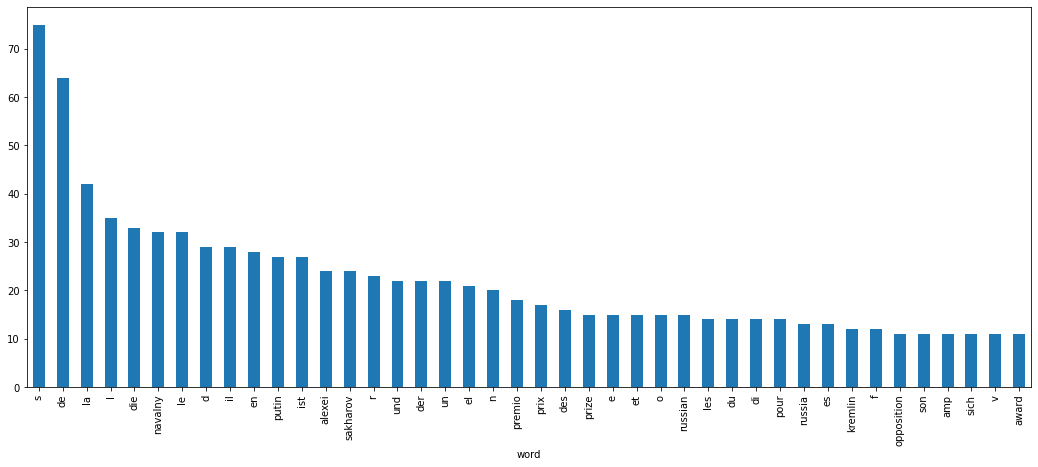

In [39]:
#Let's plot the bar chart w most commonly used words in tweets about Alexey Navalny
tmp = word_count_df_navalny[word_count_df_navalny['count'] > 10 ]
tmp.sort_values(by='count', ascending=False).plot(kind='bar', x='word', y='count', figsize=(18,7), legend=False)
plt.show()

In [41]:
#Now, to the network analysis..
#Creating vocabulary for our words....
vocabulary = {}
targets = word_count_df_navalny[word_count_df_navalny['count'] >10]['word'].to_numpy()
for word in targets:
    if word not in vocabulary:
        vocabulary[word] = len(vocabulary)

re_vocabulary = {}
for word, i in vocabulary.items():
    re_vocabulary[i] = word
    
len(vocabulary)

42

In [43]:
tweet_combinations = [list(itertools.combinations(words, 2)) for words in words_in_tweet]
combination_matrix = np.zeros((len(vocabulary), len(vocabulary)))

for tweet_comb in tweet_combinations:
    for comb in tweet_comb:
        if comb[0] in targets and comb[1] in targets:
            combination_matrix[vocabulary[comb[0]], vocabulary[comb[1]]] += 1
            combination_matrix[vocabulary[comb[1]], vocabulary[comb[0]]] += 1
        
for i in range(len(vocabulary)):
    combination_matrix[i, i] /= 2
        
combination_matrix

array([[ 1.,  3., 15., ...,  3.,  6., 14.],
       [ 3., 11., 53., ..., 11.,  9.,  4.],
       [15., 53., 56., ..., 20., 16., 12.],
       ...,
       [ 3., 11., 20., ...,  2.,  7.,  0.],
       [ 6.,  9., 16., ...,  7.,  1.,  0.],
       [14.,  4., 12., ...,  0.,  0., 10.]])

In [44]:
jaccard_matrix = 1 - distance.cdist(combination_matrix, combination_matrix, 'jaccard')
jaccard_matrix

array([[1.        , 0.04878049, 0.07317073, ..., 0.        , 0.        ,
        0.02564103],
       [0.04878049, 1.        , 0.05882353, ..., 0.1       , 0.06666667,
        0.0625    ],
       [0.07317073, 0.05882353, 1.        , ..., 0.        , 0.        ,
        0.05882353],
       ...,
       [0.        , 0.1       , 0.        , ..., 1.        , 0.125     ,
        0.        ],
       [0.        , 0.06666667, 0.        , ..., 0.125     , 1.        ,
        0.        ],
       [0.02564103, 0.0625    , 0.05882353, ..., 0.        , 0.        ,
        1.        ]])

In [45]:
nodes = []

for i in range(len(vocabulary)):
    for j in range(i+1, len(vocabulary)):
        jaccard = jaccard_matrix[i, j]
        if jaccard > 0:
            nodes.append([re_vocabulary[i], re_vocabulary[j], word_count[re_vocabulary[i]], word_count[re_vocabulary[j]], jaccard])
            
len(nodes)

586

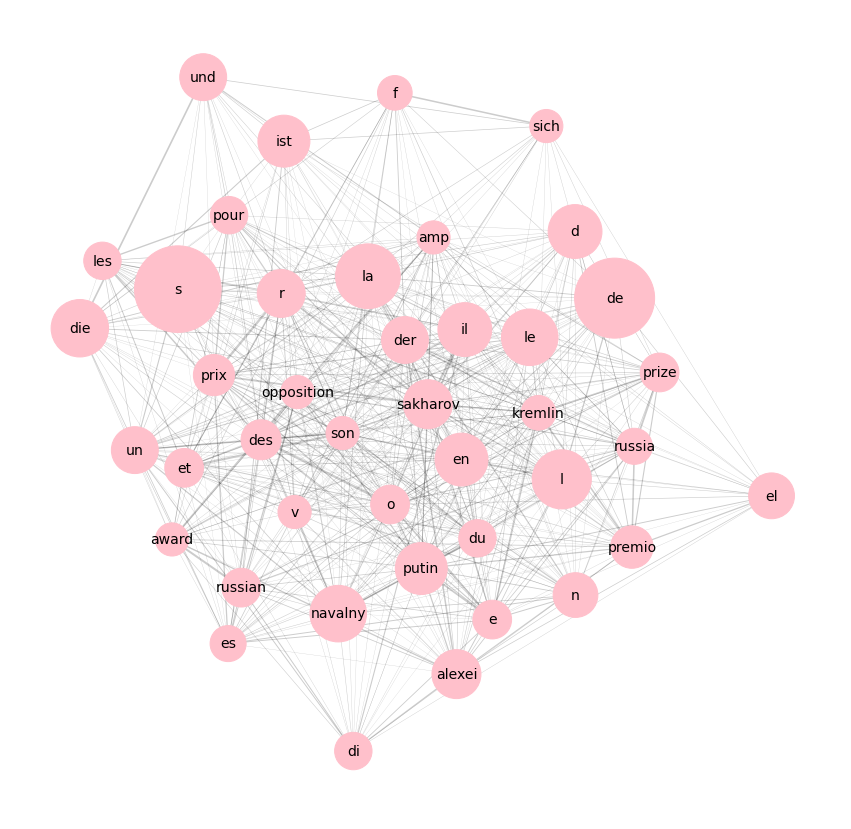

In [46]:
G = nx.Graph()
G.nodes(data=True)

for pair in nodes:
    node_x, node_y, node_x_cnt, node_y_cnt, jaccard = pair[0], pair[1], pair[2], pair[3], pair[4]
    if not G.has_node(node_x):
        G.add_node(node_x, count=node_x_cnt)
    if not G.has_node(node_y):
        G.add_node(node_y, count=node_y_cnt)
    if not G.has_edge(node_x, node_y):
        G.add_edge(node_x, node_y, weight=jaccard)
        
plt.figure(figsize=(15,15))
pos = nx.spring_layout(G, k=0.1)

node_size = [d['count']*100 for (n,d) in G.nodes(data=True)]
nx.draw_networkx_nodes(G, pos, node_color='pink', alpha=1.0, node_size=node_size)
nx.draw_networkx_labels(G, pos, font_size=14, font_family='Times New Roman')

edge_width = [d['weight']*10 for (u,v,d) in G.edges(data=True)]
nx.draw_networkx_edges(G, pos, alpha=0.2, edge_color='black', width=edge_width)

plt.axis('off')
plt.show()

Same thing for Putin.

In [47]:
tweets_2 = df_putin['cleaned_tweets'].to_numpy()
regex = u'[a-zA-Z]'

len(tweets_2)

2000

In [48]:
#splitting tweets in words AND lowering the case...
words_in_tweet_2 = [tweet.lower().split() for tweet in tweets_2]

In [49]:

# Remove collection words

tweets_nsw_2 = [[word for word in tweet_words]
              for tweet_words in words_in_tweet_2]
collection_words = ['putin', 'vladimir', 'vladimir putin']

tweets_nsw_nc = [[w for w in word if not w in collection_words]
                 for word in tweets_nsw_2]

In [50]:
#same thing
word_count = {}
for words in words_in_tweet_2:
    for word in words:
        if word not in word_count:
            word_count[word] = 1
        else:
            word_count[word] += 1
    
word_count_df_putin = pd.DataFrame({'word': [k for k in word_count.keys()], 'count': [v for v in word_count.values()]})
len(word_count_df_putin)

10105

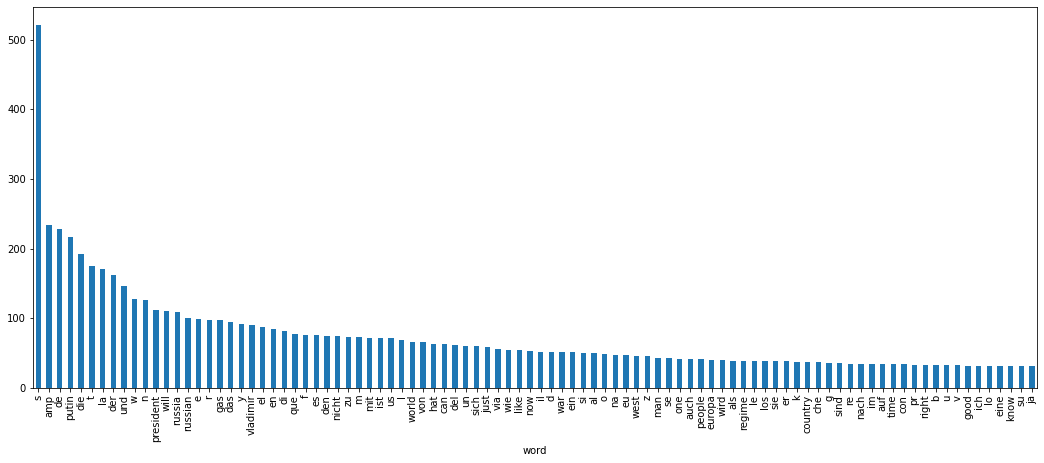

In [51]:
#lets see most commonly used words in putin tweets
tmp = word_count_df_putin[word_count_df_putin['count'] > 30 ]
#>30 because putin overall has more tweets about him (obviously so)
tmp.sort_values(by='count', ascending=False).plot(kind='bar', x='word', y='count', figsize=(18,7), legend=False)
plt.show()

In [53]:
#creating vocabulary same thing
vocabulary_putin = {}
targets_putin = word_count_df_putin[word_count_df_putin['count'] >30]['word'].to_numpy()
for word in targets_putin:
    if word not in vocabulary_putin:
        vocabulary_putin[word] = len(vocabulary_putin)

re_vocabulary_putin = {}
for word, i in vocabulary_putin.items():
    re_vocabulary_putin[i] = word
    
len(vocabulary_putin)

94

In [54]:
tweet_combinations = [list(itertools.combinations(words, 2)) for words in words_in_tweet_2]
combination_matrix = np.zeros((len(vocabulary_putin), len(vocabulary_putin)))

for tweet_comb in tweet_combinations:
    for comb in tweet_comb:
        if comb[0] in targets_putin and comb[1] in targets_putin:
            combination_matrix[vocabulary_putin[comb[0]], vocabulary_putin[comb[1]]] += 1
            combination_matrix[vocabulary_putin[comb[1]], vocabulary_putin[comb[0]]] += 1
        
for i in range(len(vocabulary_putin)):
    combination_matrix[i, i] /= 2
        
combination_matrix

array([[ 2.,  2.,  5., ...,  0.,  0.,  1.],
       [ 2.,  6.,  4., ...,  0.,  4.,  1.],
       [ 5.,  4., 43., ...,  0., 16.,  0.],
       ...,
       [ 0.,  0.,  0., ...,  9.,  0., 11.],
       [ 0.,  4., 16., ...,  0.,  3.,  0.],
       [ 1.,  1.,  0., ..., 11.,  0.,  2.]])

In [55]:
jaccard_matrix = 1 - distance.cdist(combination_matrix, combination_matrix, 'jaccard')
jaccard_matrix

array([[1.        , 0.08196721, 0.05      , ..., 0.        , 0.01587302,
        0.046875  ],
       [0.08196721, 1.        , 0.03571429, ..., 0.        , 0.02985075,
        0.        ],
       [0.05      , 0.03571429, 1.        , ..., 0.03571429, 0.04166667,
        0.03571429],
       ...,
       [0.        , 0.        , 0.03571429, ..., 1.        , 0.02739726,
        0.10169492],
       [0.01587302, 0.02985075, 0.04166667, ..., 0.02739726, 1.        ,
        0.01369863],
       [0.046875  , 0.        , 0.03571429, ..., 0.10169492, 0.01369863,
        1.        ]])

In [56]:
nodes = []

for i in range(len(vocabulary_putin)):
    for j in range(i+1, len(vocabulary_putin)):
        jaccard = jaccard_matrix[i, j]
        if jaccard > 0:
            nodes.append([re_vocabulary_putin[i], re_vocabulary_putin[j], word_count[re_vocabulary_putin[i]], word_count[re_vocabulary_putin[j]], jaccard])
            
len(nodes)

3740

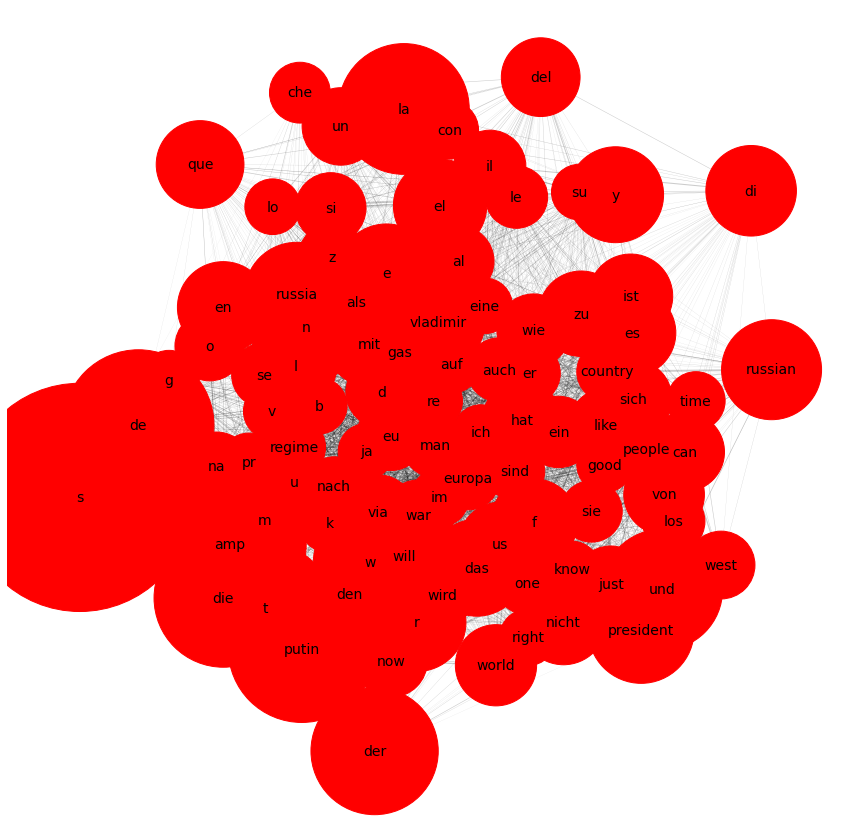

In [57]:
G = nx.Graph()
G.nodes(data=True)

for pair in nodes:
    node_x, node_y, node_x_cnt, node_y_cnt, jaccard = pair[0], pair[1], pair[2], pair[3], pair[4]
    if not G.has_node(node_x):
        G.add_node(node_x, count=node_x_cnt)
    if not G.has_node(node_y):
        G.add_node(node_y, count=node_y_cnt)
    if not G.has_edge(node_x, node_y):
        G.add_edge(node_x, node_y, weight=jaccard)
        
plt.figure(figsize=(15,15))
pos = nx.spring_layout(G, k=0.1)

node_size = [d['count']*100 for (n,d) in G.nodes(data=True)]
nx.draw_networkx_nodes(G, pos, node_color='red', alpha=1.0, node_size=node_size)
nx.draw_networkx_labels(G, pos, font_size=14, font_family='Times New Roman')

edge_width = [d['weight']*10 for (u,v,d) in G.edges(data=True)]
nx.draw_networkx_edges(G, pos, alpha=0.2, edge_color='black', width=edge_width)

plt.axis('off')
plt.show()